Here we predict insurance charges using linear regression.

## Importing and inspecting data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

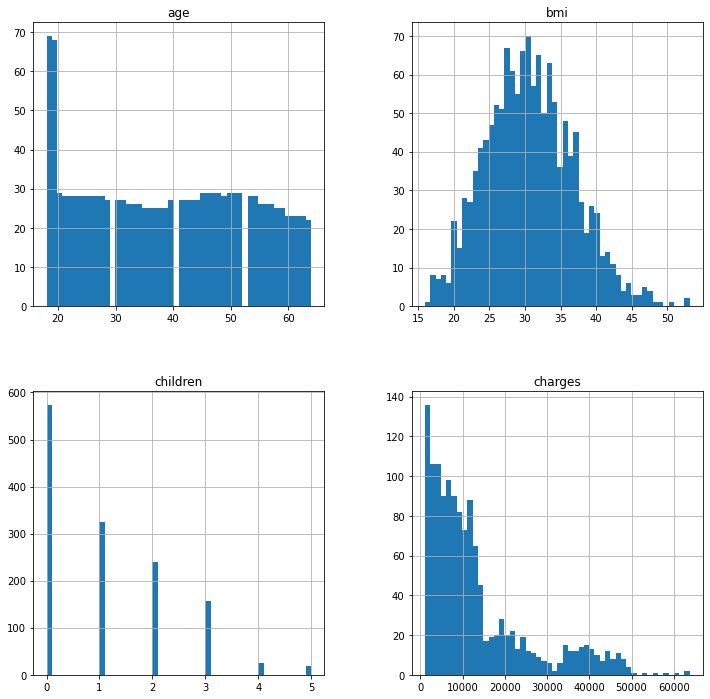

In [8]:
df.hist(bins=50, figsize=(12,12))

## Encoding categorical data as numerical data

In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe_sex = oe.fit_transform(df[['sex']])
oe_smoker = oe.fit_transform(df[['smoker']])
oe_region = oe.fit_transform(df[['region']])

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
unscaled = df.drop(['sex', 'smoker', 'region'], axis=1)

In [12]:
unscaled['sex'] = oe_sex
unscaled['smoker'] = oe_smoker
unscaled['region'] = oe_region

In [13]:
unscaled.corr()['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
sex         0.057292
smoker      0.787251
region     -0.006208
Name: charges, dtype: float64

## Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
scaled = sc.fit_transform(unscaled.drop('charges', axis=1))

In [16]:
scaleddf = pd.DataFrame(scaled)
scaleddf['charges'] = df['charges']

## Look for correlations

In [17]:
scaleddf.corr().charges

0          0.299008
1          0.198341
2          0.067998
3          0.057292
4          0.787251
5         -0.006208
charges    1.000000
Name: charges, dtype: float64

## Train test split

In [18]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(unscaled, test_size=0.2, random_state=42)

In [27]:
X_train = trainset.drop('charges', axis=1)
y_train = trainset['charges']
X_test = testset.drop('charges', axis=1)
y_test = testset['charges']

## Linear regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
predictions = lr.predict(X_test)

## Compute the root mean squared error

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

5799.587091438357